In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('data/posts.parquet')

In [3]:
df

,title,categories,body,tags,url
date,,,,,
2011-10-18 17:59:00,Короткие анекдоты,Юмор,"Че, расскажите анекдот какой-нибудь короткий. ...","анекдот,вам слово,коллекция",https://tema.livejournal.com/1000156.html
2011-10-19 09:00:00,Необычный пиар необычного датацентра,18+,* * * Реклама в уютной жэжэшечке * Текст предо...,"датацентр,колокол,постпроплачен,реклама,сиськи",https://tema.livejournal.com/1000333.html
2011-10-19 15:02:00,Ретротревел,"Путешествия, Россия","Рассказы о поездках в Берлин, Ингольштадт и Иж...","авто,берлин,германия,ижевск,ингольштадт,тревел...",https://tema.livejournal.com/1000574.html
2011-10-19 18:36:00,Кушать подано!,"Еда, История, СССР, Россия",None,"еда,завтрак,кремль,меню,обед,ссср",https://tema.livejournal.com/1000934.html
2011-10-19 22:43:00,Цвет во время ЧБ,История,"Поразительно, насколько широкое распространени...","видео,ссср,сша,фото,цвет,чб",https://tema.livejournal.com/1001195.html
...,...,...,...,...,...
2011-10-17 14:36:00,Нихуясечебывает: прокладки для подмышек,Животные,"Открыть и вести новую рубрику ""Нихуясечебывает...","гигиена,дивуар,кот,нихуясечебывает,подмышки,пр...",https://tema.livejournal.com/999056.html
2011-10-18 00:23:00,Гепатиту нет,"Общество, Медицина",Московский областной гепатологический центр за...,"гепатит,мед,реклама,социалка",https://tema.livejournal.com/999329.html
2011-10-18 04:04:00,Три вопроса,"Общество, Лытдыбр","Первый Артемий, а вот как бы вы поступили по т...","вопрос,совет",https://tema.livejournal.com/999500.html


In [4]:
df.isna().sum()

title           23
categories    2704
body           173
tags           361
url              0
dtype: int64

In [5]:
count_categories = {
    "Без категорий": int(df['categories'].isna().sum())
}

for category in df['categories']:
    if category is not None:
        for cat in category.split(', '):
            count_categories[cat] = count_categories.get(cat, 0) + 1

df_count_categories = pd.Series(count_categories).sort_values(ascending=False)
df_count_categories

Без категорий    2704
Общество         1862
Путешествия      1557
Россия           1172
Еда              1052
                 ... 
Философия          11
Энергетика         11
Рыбалка             6
Рукоделие           4
Грибы               2
Length: 75, dtype: int64

<Axes: title={'center': 'Топ 20 категорий'}>

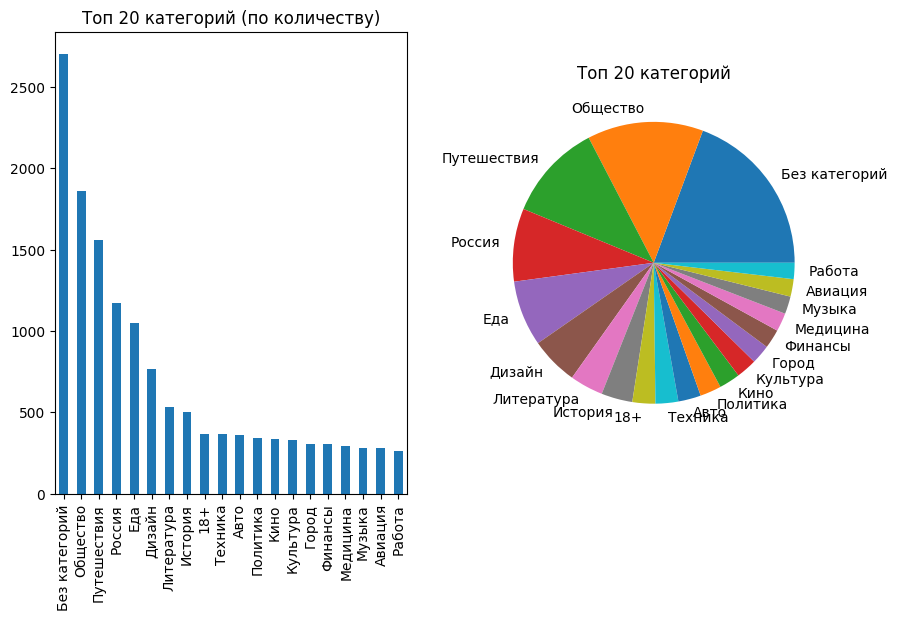

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
df_count_categories[:20].plot(kind='bar', title='Топ 20 категорий (по количеству)', ax=ax[0])
df_count_categories[:20].plot(kind='pie', title='Топ 20 категорий', ax=ax[1])

<Axes: title={'center': 'Нижние 20 категорий'}>

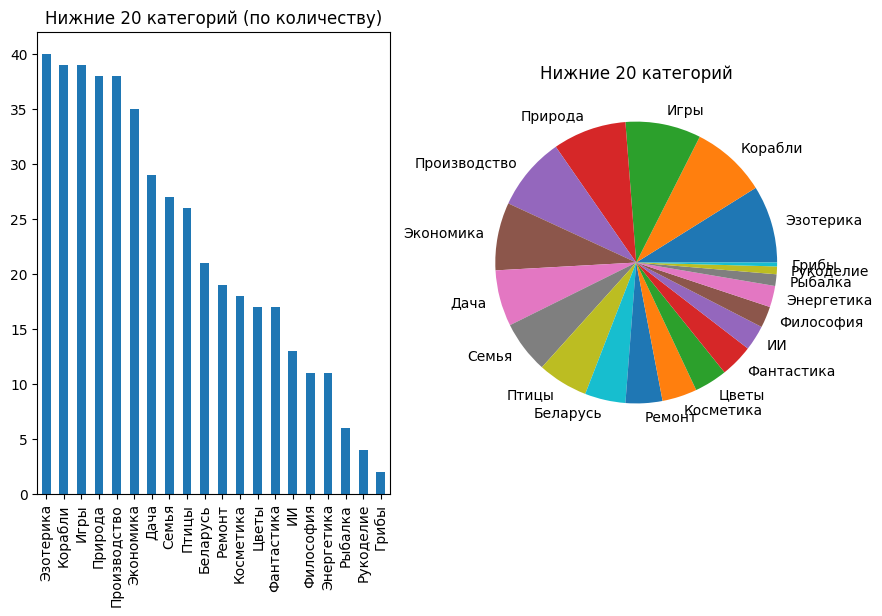

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
df_count_categories[-20:].plot(kind='bar', title='Нижние 20 категорий (по количеству)', ax=ax[0])
df_count_categories[-20:].plot(kind='pie', title='Нижние 20 категорий', ax=ax[1])


In [8]:
count_tags = {}

for tags in df['tags']:
    if tags is not None:
        for tag in tags.split(','):
            count_tags[tag] = count_tags.get(tag, 0) + 1

df_count_tags = pd.Series(count_tags).sort_values(ascending=False)
df_count_tags


фото           2280
отношение      2084
вам слово      1605
этноэксп        966
тревел          927
               ... 
эдиториум         1
сан-марино        1
универсиада       1
барсик            1
елочка            1
Length: 6869, dtype: int64

<Axes: title={'center': 'Топ 20 тегов'}>

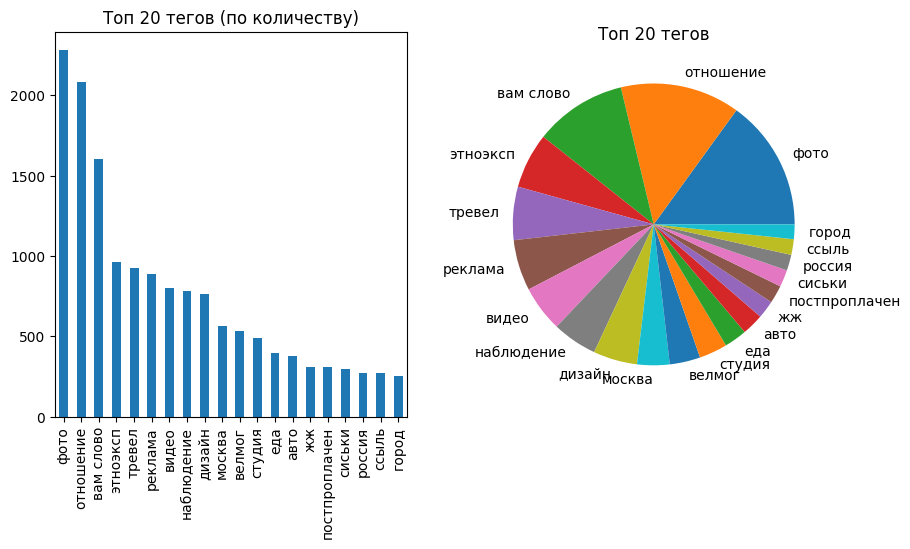

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_count_tags[:20].plot(kind='bar', title='Топ 20 тегов (по количеству)', ax=ax[0])
df_count_tags[:20].plot(kind='pie', title='Топ 20 тегов', ax=ax[1])


<Axes: title={'center': 'Нижние 20 тегов'}>

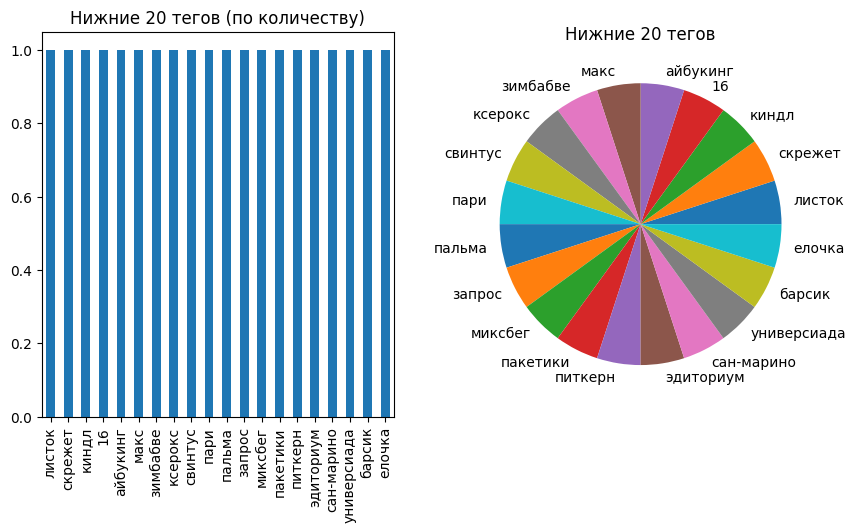

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_count_tags[-20:].plot(kind='bar', title='Нижние 20 тегов (по количеству)', ax=ax[0])
df_count_tags[-20:].plot(kind='pie', title='Нижние 20 тегов', ax=ax[1])


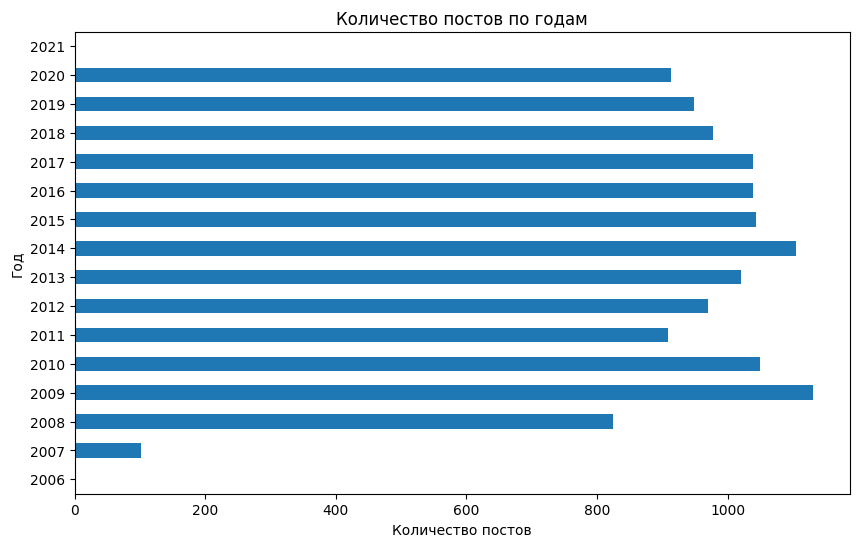

In [11]:
# Группируем данные по годам и считаем количество постов в каждом году
posts_per_year = df.resample('YE').size()

# Строим график
fig, ax = plt.subplots(figsize=(10, 6))
posts_per_year.plot(kind='barh', ax=ax, title='Количество постов по годам')  # Изменено на 'barh'
ax.set_xlabel('Количество постов')  # Поменяли местами подписи осей
ax.set_ylabel('Год')

# Устанавливаем формат меток оси Y
ax.set_yticklabels(posts_per_year.index.year)  # Изменено на set_yticklabels

plt.show()